In [129]:
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline

import matplotlib.pyplot as plt

# Requirement 1

In [3]:
# Load the dataset
appendicitis_data = pd.read_csv('appendicitis.csv')

In [4]:
appendicitis_data.head()


,Unnamed: 0,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Dysuria,Diagnosis
0,0,12.68,16.90,1,148.0,37.0,3.0,4.0,3.0,1,0,1,1,0,0,1,37.0,7.7,0,appendicitis
1,672,10.21,15.59,1,145.5,33.0,7.0,9.0,8.0,0,1,1,0,0,1,1,38.4,17.0,0,appendicitis
2,671,7.55,16.76,1,136.0,31.0,3.0,5.0,3.0,1,0,1,0,0,0,0,37.8,16.1,0,appendicitis
3,670,14.79,23.23,0,166.0,64.0,4.0,7.0,8.0,1,1,1,0,1,1,0,36.8,20.6,0,appendicitis
4,669,9.66,16.22,0,149.0,36.0,4.0,10.0,10.0,1,1,1,1,1,1,1,38.0,19.9,0,appendicitis


In [5]:
# Display basic info and first few rows to explore the dataset
print("Dataset Info:\n")
print(appendicitis_data.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        631 non-null    int64  
 1   Age                               631 non-null    float64
 2   BMI                               631 non-null    float64
 3   Sex                               631 non-null    int64  
 4   Height                            631 non-null    float64
 5   Weight                            631 non-null    float64
 6   Length_of_Stay                    631 non-null    float64
 7   Alvarado_Score                    631 non-null    float64
 8   Paedriatic_Appendicitis_Score     631 non-null    float64
 9   Appendix_on_US                    631 non-null    int64  
 10  Migratory_Pain                    631 non-null    int64  
 11  Lower_Right_Abd_Pain              631 non-null    int64 

In [6]:
# Check class distribution to assess imbalance
class_distribution = appendicitis_data['Diagnosis'].value_counts(normalize=True)
print("\nClass Distribution:\n", class_distribution)


Class Distribution:
 Diagnosis
appendicitis       0.618067
no appendicitis    0.381933
Name: proportion, dtype: float64


It is clear there is a target class imbalance, with 61.8% of the data with diagnosis appendicitis

In [7]:
# Covert the target variable 'Diagnosis' to binary
appendicitis_data['Diagnosis'] = appendicitis_data['Diagnosis'].map({'appendicitis': 1, 'no appendicitis': 0})

In [8]:
# Check for NaNs in the 'Diagnosis' column
nans_in_diagnosis = appendicitis_data['Diagnosis'].isna().sum()
print("Number of NaNs in 'Diagnosis' column:", nans_in_diagnosis)

Number of NaNs in 'Diagnosis' column: 0


In [9]:
# Define features (X) and target (y)
X = appendicitis_data.drop(columns=['Unnamed: 0', 'Diagnosis'])  # Drop unnecessary columns
y = appendicitis_data['Diagnosis']

In [49]:
# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Standardise the features for kNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

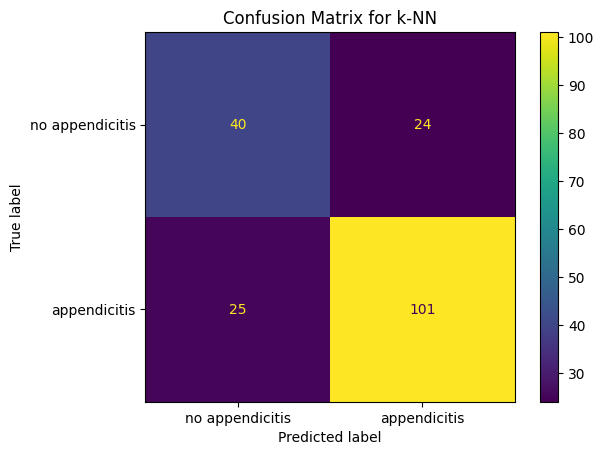

Classification Report for k-NN:

                 precision    recall  f1-score   support

no appendicitis       0.62      0.62      0.62        64
   appendicitis       0.81      0.80      0.80       126

       accuracy                           0.74       190
      macro avg       0.71      0.71      0.71       190
   weighted avg       0.74      0.74      0.74       190



In [51]:
# Initialise k-NN classifiers
knn = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate kNN
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

# Confusion matrix for k-NN
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, display_labels=['no appendicitis', 'appendicitis'])
plt.title("Confusion Matrix for k-NN")
plt.show()

print("Classification Report for k-NN:\n")
print(classification_report(y_test, knn_predictions, target_names=['no appendicitis', 'appendicitis']))

Comparing the key evaluation metrics, precision, recall, and F1-score for the kNN model reveals a clear bias toward the majority class, "appendicitis," as it performs more accurately for this class. Specifically, the "no appendicitis" class has a precision of 0.62 compared to 0.81 for appendicitis, a recall of 0.62 versus 0.80, and an F1-score of 0.62 versus 0.80. These discrepancies highlight the model’s struggle to correctly classify instances of the minority class no appendicitis, highlighting its tendency to favor the majority class in predictions. The overall accuracy metric isnt considered as much as it just give a general view of the model.

A key metric in this analysis is the F1-score for each class, as it combines both precision and recall into a single value, providing a balanced measure of performance. 

The other key metric is Recall.  Improving high recall for the "no appendicitis" class is important because it’s underrepresented as the minority class. In imbalanced datasets, models often develop a bias toward the majority class, making it harder to correctly identify positive cases in the minority class. Boosting recall for "no appendicitis" helps address this bias, ensuring that true "no appendicitis" cases are not overlooked, even with their lower representation.

Conversely, high recall for the "appendicitis" class is essential to minimise false negatives, as missing actual cases of appendicitis can lead to severe complications if untreated. Balancing recall for both classes ensures that the model effectively identifies true cases of appendicitis while preventing over-diagnosis in the minority "no appendicitis" group.

Therefore the key metrics that will be looked at it no appendicitis F1 score and recall, appendicitis recall and overall F1 score

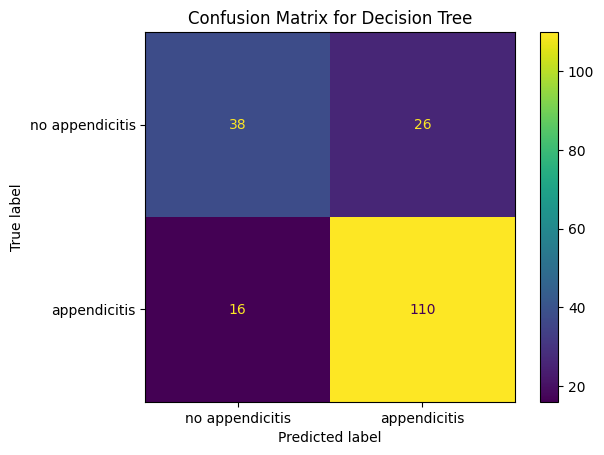

Classification Report for Decision Tree:

                 precision    recall  f1-score   support

no appendicitis       0.70      0.59      0.64        64
   appendicitis       0.81      0.87      0.84       126

       accuracy                           0.78       190
      macro avg       0.76      0.73      0.74       190
   weighted avg       0.77      0.78      0.77       190



In [136]:
# Initialise Decision Tree classifiers
decision_tree = DecisionTreeClassifier(random_state=42)

# Train and evaluate Decsion Tree
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)

ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, display_labels=['no appendicitis', 'appendicitis'])
plt.title("Confusion Matrix for Decision Tree")
plt.show()

print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, dt_predictions, target_names=['no appendicitis', 'appendicitis']))

Comparing the key evaluation metrics, precision, recall, and F1-score for the Decision Tree model reveals a clear bias toward the majority class, "appendicitis," as it performs more accurately for this class. Specifically, the "no appendicitis" class has a precision of 0.7 compared to 0.81 for appendicitis, a recall of 0.59 versus 0.87, and an F1-score of 0.64 versus 0.84. These discrepancies highlight the model’s struggle to correctly classify instances of the minority class no appendicitis, highlighting its tendency to favor the majority class in predictions. 

For the same reasons as in the KNN model,  the key metrics that will be looked at it no appendicitis F1 score and recall, appendicitis recall and overall F1 score

### Setting up Cross validation scoring and printing function

Cross Validation is performed to get a low variance measurement of the key performance metrics for each classifier, in order to evaluate if the strategies work in combating the imbalance in the classes

In [118]:
# Define custom scoring for F1 and Recall for each class
scoring = {
    'f1_no_appendicitis': make_scorer(f1_score, pos_label=0, average='binary'),           # F1 for 'no appendicitis'
    'recall_no_appendicitis': make_scorer(recall_score, pos_label=0, average='binary'),   # Recall for 'no appendicitis'
    'recall_appendicitis': make_scorer(recall_score, pos_label=1, average='binary'),      # Recall for 'appendicitis'
    'f1_macro': make_scorer(f1_score, average='macro')                                    # Overall (macro-averaged) F1 score
}


These metrics were chosen to mitigate the imbalance of the classifiers, while also keeping overall high recall for the appendicitis class

In [137]:
def display_cv_scores(cv_results, num_folds=5):
    """
    Displays cross-validation scores with average values appended.

    Parameters:
    - cv_results (dict): Dictionary containing cross-validation results.
    - num_folds (int): Number of folds used in cross-validation.

    Returns:
    - None
    """
    # Create DataFrame with fold scores
    scores_df = pd.DataFrame({
        'Fold': range(1, num_folds + 1),
        'F1 no appendicitis': cv_results['test_f1_no_appendicitis'],
        'Recall no appendicitis': cv_results['test_recall_no_appendicitis'],
        'Recall appendicitis': cv_results['test_recall_appendicitis'],
        'Overall F1 (Macro)': cv_results['test_f1_macro']
    })

    # Calculate and append the average scores
    avg_scores = scores_df.mean().to_frame().T
    avg_scores['Fold'] = 'Average'
    scores_df = pd.concat([scores_df, avg_scores], ignore_index=True)


    # Display the scores without the index
    print("F1 and Recall Scores for Each Class and Overall F1 (Macro):")
    print(scores_df.to_string(index=False))

### Cross Validation for each model

In [120]:
#KNN Classifier - Cross valdiaiton on basic imbalanced model

knn_classifier = KNeighborsClassifier(n_neighbors=5)


# Define the pipeline with StandardScaler for scaling and KNN for classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),             # Standard scaling
    ('classifier', knn_classifier)            # KNN classifier
])

# Define stratified k-fold cross-validation - key for an imbalanced data-set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and calculate F1 and Recall for each class
cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

# Call predefined fucntion to Display dataframe of results
display_cv_scores(cv_results, num_folds=5)

F1 and Recall Scores for Each Class and Overall F1 (Macro):
   Fold  F1 no appendicitis  Recall no appendicitis  Recall appendicitis  Overall F1 (Macro)
      1            0.560976                0.469388             0.871795            0.675837
      2            0.564706                0.500000             0.833333            0.671574
      3            0.643678                0.583333             0.858974            0.727900
      4            0.701031                0.708333             0.807692            0.756967
      5            0.704545                0.645833             0.884615            0.773004
Average            0.634987                0.581378             0.851282            0.721056


In [121]:
#Decision Tree Classifier - Cross valdiaiton on basic imbalanced model

decision_tree = DecisionTreeClassifier(random_state=42)

# Set up Stratified K-Fold cross-validation - key for an imbalanced data-set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and calculate F1 and Recall for each class
cv_results = cross_validate(decision_tree, X, y, cv=cv, scoring=scoring)

# Call predefined fucntion to Display dataframe of results
display_cv_scores(cv_results, num_folds=5)


F1 and Recall Scores for Each Class and Overall F1 (Macro):
   Fold  F1 no appendicitis  Recall no appendicitis  Recall appendicitis  Overall F1 (Macro)
      1            0.694737                0.673469             0.833333            0.756173
      2            0.680412                0.687500             0.794872            0.740206
      3            0.686275                0.729167             0.756410            0.736471
      4            0.721649                0.729167             0.820513            0.773728
      5            0.617021                0.604167             0.782051            0.694587
Average            0.680019                0.684694             0.797436            0.740233


These average values are more robust and low variance than the training split values, and will be used for as a baseline performance for the classifiers

# Requirment 2

### Decision Tree Classifier Strategies

**Strategy 1:** Ajust class weights in classifier

The strategy here is to automatically assign a higher weight to the minority class, helping the model focus more on correctly classifying minority samples.


In [122]:
decision_tree_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [123]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and calculate F1 and Recall for each class
cv_results = cross_validate(decision_tree_balanced, X, y, cv=cv, scoring=scoring)

# Call predefined fucntion to Display dataframe of results
display_cv_scores(cv_results, num_folds=5)

F1 and Recall Scores for Each Class and Overall F1 (Macro):
   Fold  F1 no appendicitis  Recall no appendicitis  Recall appendicitis  Overall F1 (Macro)
      1            0.652632                0.632653             0.807692            0.722542
      2            0.692308                0.750000             0.743590            0.738046
      3            0.730769                0.791667             0.769231            0.770790
      4            0.775510                0.791667             0.846154            0.816327
      5            0.645161                0.625000             0.807692            0.718807
Average            0.699276                0.718197             0.794872            0.753302


This yielded a small increase in all metrics, mostly effecting the no appendicitis class.

**Strategy 2:** resampling using imbalanced-learn library

This strategy applies SMOTE to the training set, creating diverse synthetic samples that better capture natural class distributions and reduce overfitting. 

In [101]:
# Define the pipeline with SMOTE for oversampling and the Decision Tree classifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to balance classes in training
    ('classifier', decision_tree_balanced)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and calculate F1 and Recall for each class
cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

# Call predefined fucntion to Display dataframe of results
display_cv_scores(cv_results, num_folds=5)


F1 and Recall Scores for Each Class and Overall F1 (Macro):
   Fold  F1 no appendicitis  Recall no appendicitis  Recall appendicitis  Overall F1 (Macro)
      1            0.714286                0.714286             0.820513            0.767399
      2            0.787879                0.812500             0.846154            0.825312
      3            0.693069                0.729167             0.769231            0.743886
      4            0.727273                0.750000             0.807692            0.775401
      5            0.615385                0.666667             0.692308            0.672557
Average            0.707578                0.734524             0.787179            0.756911


This yielded a small increase in all metrics, mostly effecting the no appendicitis class.

**Strategy 3:** Optimise Classifier with GridSearch

In [133]:


# Define the pipeline with SMOTE for resampling and the Decision Tree classifier
pipeline = Pipeline([
    ('resample', SMOTE(random_state=42)),  # Apply SMOTETomek to balance classes
    ('classifier', decision_tree_balanced)
])

# Set up grid search for hyperparameter tuning with recall as the primary metric
param_grid = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with overal F1 as the scoring metric (choice commented on below)
grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring['f1_macro'], cv=5, n_jobs=-1)
# grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring['recall_no_appendicitis'], cv=5, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X, y)

# Get the best estimator and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters found
print("Best parameters found for optimising recall of 'no appendicitis':")
print(best_params)
print('\n')

# Perform cross-validation with the best model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(best_model, X, y, cv=cv, scoring=scoring)

# Call predefined fucntion to Display dataframe of results
display_cv_scores(cv_results, num_folds=5)



Best parameters found for optimising recall of 'no appendicitis':
{'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}


F1 and Recall Scores for Each Class and Overall F1 (Macro):
   Fold  F1 no appendicitis  Recall no appendicitis  Recall appendicitis  Overall F1 (Macro)
      1            0.727273                0.653061             0.910256            0.791347
      2            0.717391                0.687500             0.858974            0.777446
      3            0.714286                0.625000             0.923077            0.785714
      4            0.772277                0.812500             0.820513            0.809980
      5            0.651685                0.604167             0.846154            0.730751
Average            0.716582                0.676446             0.871795            0.779047


The key decision in this strategy was what metric to optimise. If purely looking to reduce imbalance in the dataset, then the 'no appendicitis' class Recall metric would be optimised. This was orginally done and it gives a balanced classifier. However, as the use case here is to diagnose a disease, which would be detrimental if left undiagnosed, it would be possibly unwise to not optimise the positive class, appendicitis. Therefore the general F1 score was optimised, with it yielding a high recall for the postiive class.

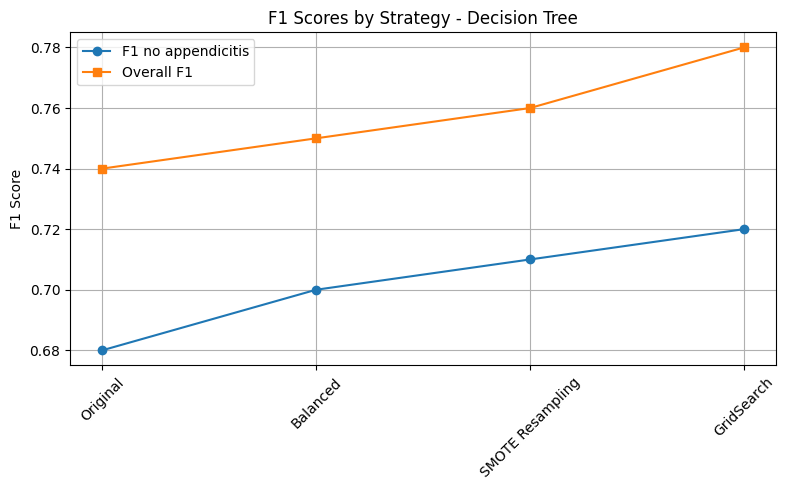

In [107]:

# Decision Tree data
f1_scores_tree = {
    'Strategy': ['Original', 'Balanced', 'SMOTE Resampling', 'GridSearch'],
    'F1 no appendicitis': [0.68, 0.7, 0.71, 0.72],
    'Overall F1': [0.74, 0.75, 0.76, 0.78]
}

# Create DataFrame
f1_df_tree = pd.DataFrame(f1_scores_tree)

# Plot for Decision Tree
fig, ax = plt.subplots(figsize=(8, 5))

# Line plots with markers
ax.plot(f1_df_tree['Strategy'], f1_df_tree['F1 no appendicitis'], marker='o', label='F1 no appendicitis')
ax.plot(f1_df_tree['Strategy'], f1_df_tree['Overall F1'], marker='s', label='Overall F1')

# Add labels and title
ax.set_ylabel("F1 Score")
ax.set_title("F1 Scores by Strategy - Decision Tree")
ax.legend()
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


As seen, the F1 score improves for the underrepresented class through the various strategies, creating a more balanced classifier. Recall has a similar trend, exept for the dip at the end when the overall model is optimised generally.

# Requirement 3

### Knn Classifier Strategies

**Strategy 1:** resampling using SMOTE from imbalanced-learn library

This strategy applies SMOTE to training set, creating diverse synthetic samples that better capture natural class distributions and reduce overfitting.

In [127]:

knn_classifier = KNeighborsClassifier(n_neighbors=5)


# Define the pipeline with StandardScaler for scaling, SMOTE for resampling, and KNN for classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),             
    ('smote', SMOTE(random_state=42)),        
    ('classifier', knn_classifier)            
])

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and calculate F1 and Recall for each class
cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

# Call predefined fucntion to Display dataframe of results
display_cv_scores(cv_results, num_folds=5)



F1 and Recall Scores for Each Class and Overall F1 (Macro):
   Fold  F1 no appendicitis  Recall no appendicitis  Recall appendicitis  Overall F1 (Macro)
      1            0.631579                0.612245             0.794872            0.705727
      2            0.600000                0.625000             0.717949            0.668421
      3            0.654206                0.729167             0.692308            0.699517
      4            0.690265                0.812500             0.666667            0.719233
      5            0.742857                0.812500             0.769231            0.779592
Average            0.663781                0.718282             0.728205            0.714498


This strategy yielded an increase in performance metrics, mostly effecting the no appendicitis class.

**Strategy 2:** Random Oversampling

In [130]:
# Define pipeline with RandomOverSampler
pipeline_over = Pipeline([
    ('scaler', StandardScaler()),               # Step 1: Standard scaling
    ('oversample', RandomOverSampler(random_state=42)),  # Step 2: Random Oversampling
    ('classifier', knn_classifier)              # Step 3: KNN classifier
])

# Perform stratified cross-validation and calculate F1 and Recall for each class
cv_results_over = cross_validate(pipeline_over, X, y, cv=cv, scoring=scoring)

# Display results
display_cv_scores(cv_results_over, num_folds=5)

F1 and Recall Scores for Each Class and Overall F1 (Macro):
   Fold  F1 no appendicitis  Recall no appendicitis  Recall appendicitis  Overall F1 (Macro)
      1            0.597938                0.591837             0.756410            0.674765
      2            0.604167                0.604167             0.756410            0.680288
      3            0.699029                0.750000             0.756410            0.745488
      4            0.701754                0.833333             0.666667            0.727689
      5            0.737864                0.791667             0.782051            0.778328
Average            0.668150                0.714201             0.743590            0.721312


The performance gain here was for the 'appendicitis' class Recall (by roughly +2), with no difference to the underrepresented class

**Strategy 3:** NearMiss (Undersampling)

In [131]:

# Define pipeline with NearMiss
pipeline_nearmiss = Pipeline([
    ('scaler', StandardScaler()),                # Step 1: Standard scaling
    ('nearmiss', NearMiss()),                    # Step 2: NearMiss Undersampling
    ('classifier', knn_classifier)               # Step 3: KNN classifier
])

# Perform stratified cross-validation and calculate F1 and Recall for each class
cv_results_nearmiss = cross_validate(pipeline_nearmiss, X, y, cv=cv, scoring=scoring)

# Display results
display_cv_scores(cv_results_nearmiss, num_folds=5)


F1 and Recall Scores for Each Class and Overall F1 (Macro):
   Fold  F1 no appendicitis  Recall no appendicitis  Recall appendicitis  Overall F1 (Macro)
      1            0.631579                0.612245             0.794872            0.705727
      2            0.583333                0.583333             0.743590            0.663462
      3            0.653061                0.666667             0.769231            0.716141
      4            0.711538                0.770833             0.756410            0.754418
      5            0.688172                0.666667             0.833333            0.752891
Average            0.653537                0.659949             0.779487            0.718528


Here there was a performance increase for appendicitis Recall, but a *decrease* for the no appendicitis class

**Strategy 4:** Optimise Classifier with GridSearch

In [134]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),           
    ('oversample', RandomOverSampler(random_state=42)),
    ('classifier', knn_classifier)           
])

# Define parameter grid for grid search
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],        # Number of neighbors to consider
    'classifier__weights': ['uniform', 'distance'], # Weight function used in prediction
    'classifier__metric': ['euclidean', 'manhattan'] # Distance metric to use
}

# Set up grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring['f1_macro'], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1)


grid_search.fit(X, y)

# Get the best estimator and parameters from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters found
print("Best parameters found for optimising F1 score (macro):")
print(best_params)

# Perform cross-validation with the best model and scoring metrics
cv_results = cross_validate(best_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scoring)

# Call predefined fucntion to Display dataframe of results
display_cv_scores(cv_results, num_folds=5)

Best parameters found for optimising F1 score (macro):
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
F1 and Recall Scores for Each Class and Overall F1 (Macro):
   Fold  F1 no appendicitis  Recall no appendicitis  Recall appendicitis  Overall F1 (Macro)
      1            0.687500                0.673469             0.820513            0.748813
      2            0.679612                0.729167             0.743590            0.729068
      3            0.699029                0.750000             0.756410            0.745488
      4            0.666667                0.770833             0.666667            0.702128
      5            0.705882                0.750000             0.769231            0.752941
Average            0.687738                0.734694             0.751282            0.735687


Once again. the key decision in this strategy was what metric to optimise. If purely looking to reduce imbalance in the dataset, then the 'no appendicitis' class Recall metric would be optimised. However, as the use case here is to diagnose a disease, which would be detrimental if left undiagnosed, it would be possibly unwise to not optimise the positive class, appendicitis. Therefore the general F1 score was optimised, with it yielding a high recall for the postiive class. The reuslts boosted the classifier's performance, particualry the no appendicitis class

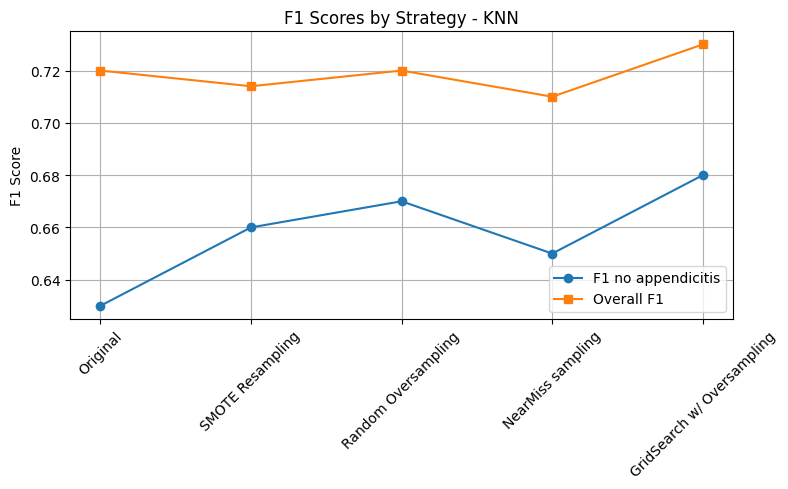

In [135]:
# Decision Tree data
f1_scores_knn = {
    'Strategy': ['Original', 'SMOTE Resampling', 'Random Oversampling', 'NearMiss sampling','GridSearch w/ Oversampling'],
    'F1 no appendicitis': [0.63, 0.66, 0.67, 0.65, 0.68],
    'Overall F1': [0.72, 0.714, 0.72, 0.71, 0.73]
}

# Create DataFrame
f1_df_knn = pd.DataFrame(f1_scores_knn)

# Plot for Decision Tree
fig, ax = plt.subplots(figsize=(8, 5))

# Line plots with markers
ax.plot(f1_df_knn['Strategy'], f1_df_knn['F1 no appendicitis'], marker='o', label='F1 no appendicitis')
ax.plot(f1_df_knn['Strategy'], f1_df_knn['Overall F1'], marker='s', label='Overall F1')

# Add labels and title
ax.set_ylabel("F1 Score")
ax.set_title("F1 Scores by Strategy - KNN")
ax.legend()
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As seen, the F1 score improves for the underrepresented class through the various strategies, creating a more balanced classifier.